In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import datashader as ds
import holoviews as hv
from holoviews.element.tiles import EsriImagery
from holoviews.operation.datashader import datashade
import colorcet as cc

In [50]:
df = pd.read_csv(r'C:\Users\kirch\OneDrive\Dokumente\Uni\Mannheim\FSS2022\Teamproject\Data\train.csv')

In [51]:
df

id  vendor_id      pickup_datetime     dropoff_datetime  \
0        id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1        id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2        id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3        id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4        id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   
...            ...        ...                  ...                  ...   
1458639  id2376096          2  2016-04-08 13:31:04  2016-04-08 13:44:02   
1458640  id1049543          1  2016-01-10 07:35:15  2016-01-10 07:46:10   
1458641  id2304944          2  2016-04-22 06:57:41  2016-04-22 07:10:25   
1458642  id2714485          1  2016-01-05 15:56:26  2016-01-05 16:02:39   
1458643  id1209952          1  2016-04-05 14:44:25  2016-04-05 14:47:43   

         passenger_count  pickup_longitude  pickup_latitude  \
0                      1        -73.982155        40.767937   
1                      1        -73.980415        40.738564   
2                      1        -73.979027        40.763939   
3                      1        -74.010040        40.719971   
4                      1        -73.973053        40.793209   
...                  ...               ...              ...   
1458639                4        -73.982201        40.745522   
1458640                1        -74.000946        40.747379   
1458641                1        -73.959129        40.768799   
1458642                1        -73.982079        40.749062   
1458643                1        -73.979538        40.781750   

         dropoff_longitude  dropoff_latitude store_and_fwd_flag  trip_duration  
0               -73.964630         40.765602                  N            455  
1               -73.999481         40.731152                  N            663  
2               -74.005333         40.710087                  N           2124  
3               -74.012268         40.706718                  N            429  
4               -73.972923         40.782520                  N            435  
...                    ...               ...                ...            ...  
1458639         -73.994911         40.740170                  N            778  
1458640         -73.970184         40.796547                  N            655  
1458641         -74.004433         40.707371                  N            764  
1458642         -73.974632         40.757107                  N            373  
1458643         -73.972809         40.790585                  N            198  

[1458644 rows x 11 columns]

- trip duration in seconds

In [52]:
df.describe()

vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
count  1.458644e+06     1.458644e+06      1.458644e+06     1.458644e+06   
mean   1.534950e+00     1.664530e+00     -7.397349e+01     4.075092e+01   
std    4.987772e-01     1.314242e+00      7.090186e-02     3.288119e-02   
min    1.000000e+00     0.000000e+00     -1.219333e+02     3.435970e+01   
25%    1.000000e+00     1.000000e+00     -7.399187e+01     4.073735e+01   
50%    2.000000e+00     1.000000e+00     -7.398174e+01     4.075410e+01   
75%    2.000000e+00     2.000000e+00     -7.396733e+01     4.076836e+01   
max    2.000000e+00     9.000000e+00     -6.133553e+01     5.188108e+01   

       dropoff_longitude  dropoff_latitude  trip_duration  
count       1.458644e+06      1.458644e+06   1.458644e+06  
mean       -7.397342e+01      4.075180e+01   9.594923e+02  
std         7.064327e-02      3.589056e-02   5.237432e+03  
min        -1.219333e+02      3.218114e+01   1.000000e+00  
25%        -7.399133e+01      4.073588e+01   3.970000e+02  
50%        -7.397975e+01      4.075452e+01   6.620000e+02  
75%        -7.396301e+01      4.076981e+01   1.075000e+03  
max        -6.133553e+01      4.392103e+01   3.526282e+06

In [53]:
# missing values
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

- the dataset is complete (no missing values)

In [54]:
# remove obvious outliers
allLat  = np.array(list(df['pickup_latitude'])  + list(df['dropoff_latitude']))
allLong = np.array(list(df['pickup_longitude']) + list(df['dropoff_longitude']))

longLimits = [np.percentile(allLong, 0.3), np.percentile(allLong, 99.7)]
latLimits  = [np.percentile(allLat , 0.3), np.percentile(allLat , 99.7)]
durLimits  = [np.percentile(df['trip_duration'], 0.4), np.percentile(df['trip_duration'], 99.7)]

df = df[(df['pickup_latitude']   >= latLimits[0] ) & (df['pickup_latitude']   <= latLimits[1]) ]
df = df[(df['dropoff_latitude']  >= latLimits[0] ) & (df['dropoff_latitude']  <= latLimits[1]) ]
df = df[(df['pickup_longitude']  >= longLimits[0]) & (df['pickup_longitude']  <= longLimits[1])]
df = df[(df['dropoff_longitude'] >= longLimits[0]) & (df['dropoff_longitude'] <= longLimits[1])]
df = df[(df['trip_duration']     >= durLimits[0] ) & (df['trip_duration']     <= durLimits[1]) ]
df = df.reset_index(drop=True)

#allLat  = np.array(list(df['pickup_latitude'])  + list(df['dropoff_latitude']))
#allLong = np.array(list(df['pickup_longitude']) + list(df['dropoff_longitude']))

In [55]:
latLimits

[40.64159393310546, 40.85240226364136]

In [56]:
df

id  vendor_id      pickup_datetime     dropoff_datetime  \
0        id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1        id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2        id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3        id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4        id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   
...            ...        ...                  ...                  ...   
1420053  id2376096          2  2016-04-08 13:31:04  2016-04-08 13:44:02   
1420054  id1049543          1  2016-01-10 07:35:15  2016-01-10 07:46:10   
1420055  id2304944          2  2016-04-22 06:57:41  2016-04-22 07:10:25   
1420056  id2714485          1  2016-01-05 15:56:26  2016-01-05 16:02:39   
1420057  id1209952          1  2016-04-05 14:44:25  2016-04-05 14:47:43   

         passenger_count  pickup_longitude  pickup_latitude  \
0                      1        -73.982155        40.767937   
1                      1        -73.980415        40.738564   
2                      1        -73.979027        40.763939   
3                      1        -74.010040        40.719971   
4                      1        -73.973053        40.793209   
...                  ...               ...              ...   
1420053                4        -73.982201        40.745522   
1420054                1        -74.000946        40.747379   
1420055                1        -73.959129        40.768799   
1420056                1        -73.982079        40.749062   
1420057                1        -73.979538        40.781750   

         dropoff_longitude  dropoff_latitude store_and_fwd_flag  trip_duration  
0               -73.964630         40.765602                  N            455  
1               -73.999481         40.731152                  N            663  
2               -74.005333         40.710087                  N           2124  
3               -74.012268         40.706718                  N            429  
4               -73.972923         40.782520                  N            435  
...                    ...               ...                ...            ...  
1420053         -73.994911         40.740170                  N            778  
1420054         -73.970184         40.796547                  N            655  
1420055         -74.004433         40.707371                  N            764  
1420056         -73.974632         40.757107                  N            373  
1420057         -73.972809         40.790585                  N            198  

[1420058 rows x 11 columns]

In [57]:
# remove pickups and dropoffs outside of Manhattan
# all points with latitude smaller than 40.70 and greater than 40.90 are definitely outside of Manhattan
manhattan_lat_limits = np.array([40.70, 40.90])
manhattan_lon_limits = np.array([-74.016, -73.9102])

df = df[(df['pickup_latitude']   >= manhattan_lat_limits[0] ) & (df['pickup_latitude']   <= manhattan_lat_limits[1]) ]
df = df[(df['dropoff_latitude']  >= manhattan_lat_limits[0] ) & (df['dropoff_latitude']  <= manhattan_lat_limits[1]) ]
df = df[(df['pickup_longitude']  >= manhattan_lon_limits[0]) & (df['pickup_longitude']  <= manhattan_lon_limits[1])]
df = df[(df['dropoff_longitude'] >= manhattan_lon_limits[0]) & (df['dropoff_longitude'] <= manhattan_lon_limits[1])]
df = df.reset_index(drop=True)
df

id  vendor_id      pickup_datetime     dropoff_datetime  \
0        id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1        id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2        id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3        id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4        id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   
...            ...        ...                  ...                  ...   
1262937  id2376096          2  2016-04-08 13:31:04  2016-04-08 13:44:02   
1262938  id1049543          1  2016-01-10 07:35:15  2016-01-10 07:46:10   
1262939  id2304944          2  2016-04-22 06:57:41  2016-04-22 07:10:25   
1262940  id2714485          1  2016-01-05 15:56:26  2016-01-05 16:02:39   
1262941  id1209952          1  2016-04-05 14:44:25  2016-04-05 14:47:43   

         passenger_count  pickup_longitude  pickup_latitude  \
0                      1        -73.982155        40.767937   
1                      1        -73.980415        40.738564   
2                      1        -73.979027        40.763939   
3                      1        -74.010040        40.719971   
4                      1        -73.973053        40.793209   
...                  ...               ...              ...   
1262937                4        -73.982201        40.745522   
1262938                1        -74.000946        40.747379   
1262939                1        -73.959129        40.768799   
1262940                1        -73.982079        40.749062   
1262941                1        -73.979538        40.781750   

         dropoff_longitude  dropoff_latitude store_and_fwd_flag  trip_duration  
0               -73.964630         40.765602                  N            455  
1               -73.999481         40.731152                  N            663  
2               -74.005333         40.710087                  N           2124  
3               -74.012268         40.706718                  N            429  
4               -73.972923         40.782520                  N            435  
...                    ...               ...                ...            ...  
1262937         -73.994911         40.740170                  N            778  
1262938         -73.970184         40.796547                  N            655  
1262939         -74.004433         40.707371                  N            764  
1262940         -73.974632         40.757107                  N            373  
1262941         -73.972809         40.790585                  N            198  

[1262942 rows x 11 columns]

C:\Users\kirch\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


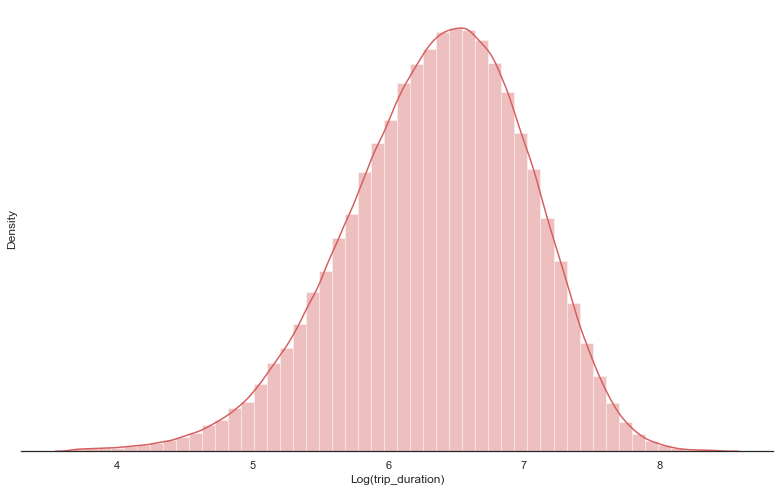

In [58]:
%matplotlib inline
#start = time.time()
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(1, 1, figsize=(11, 7), sharex=True)
sns.despine(left=True)
sns.distplot(np.log(df['trip_duration'].values+1), axlabel = 'Log(trip_duration)', label = 'log(trip_duration)', bins = 50, color="r")
plt.setp(axes, yticks=[])
plt.tight_layout()
#end = time.time()
#print("Time taken by above cell is {}.".format((end-start)))
plt.show()

- Gaussian distribution
- most trips take between e^4 (~1 minute) and e^8 (~50 minutes)

C:\Users\kirch\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\kirch\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\kirch\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

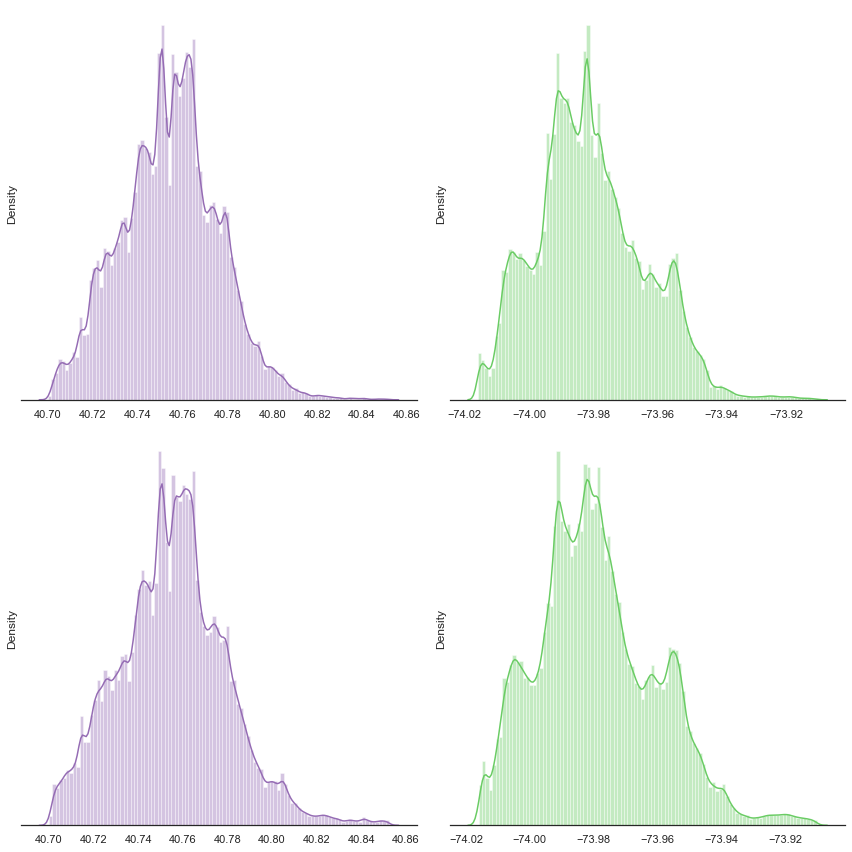

In [59]:
df2 = df.loc[(df.pickup_latitude > 40.6) & (df.pickup_latitude < 40.9)]
df2 = df2.loc[(df2.dropoff_latitude>40.6) & (df2.dropoff_latitude < 40.9)]
df2 = df2.loc[(df2.dropoff_longitude > -74.05) & (df2.dropoff_longitude < -73.7)]
df2 = df2.loc[(df2.pickup_longitude > -74.05) & (df2.pickup_longitude < -73.7)]
train_data_new = df2.copy()
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(2,2,figsize=(12, 12), sharex=False, sharey = False)#
sns.despine(left=True)
sns.distplot(train_data_new['pickup_latitude'].values, label = 'pickup_latitude',color="m",bins = 100, ax=axes[0,0])
sns.distplot(train_data_new['pickup_longitude'].values, label = 'pickup_longitude',color="g",bins =100, ax=axes[0,1])
sns.distplot(train_data_new['dropoff_latitude'].values, label = 'dropoff_latitude',color="m",bins =100, ax=axes[1, 0])
sns.distplot(train_data_new['dropoff_longitude'].values, label = 'dropoff_longitude',color="g",bins =100, ax=axes[1, 1])
plt.setp(axes, yticks=[])
plt.tight_layout()
#print(df.shape[0], train_data.shape[0])
plt.show()

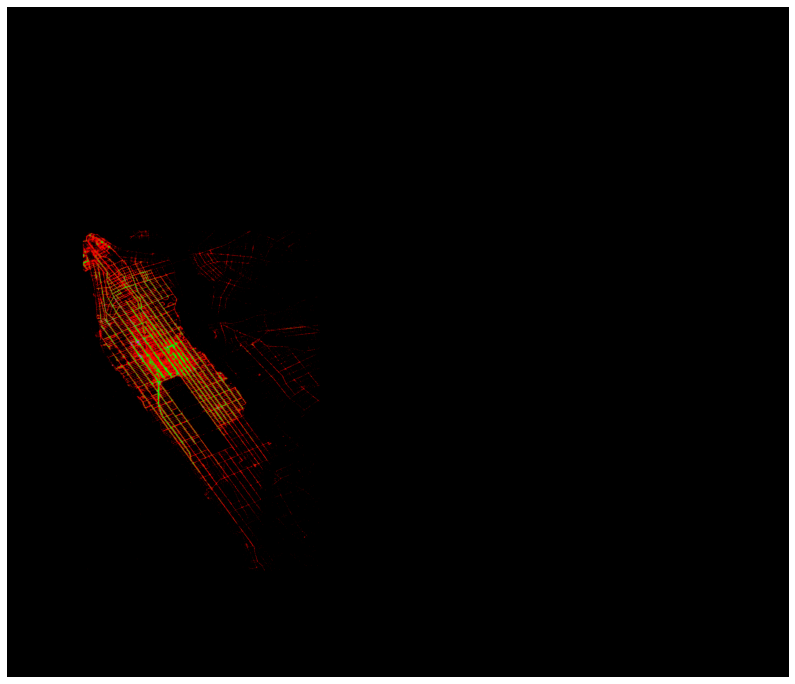

In [60]:
rgb = np.zeros((3000, 3500, 3), dtype=np.uint8)
rgb[..., 0] = 0
rgb[..., 1] = 0
rgb[..., 2] = 0
train_data_new['pick_lat_new'] = list(map(int, (train_data_new['pickup_latitude'] - (40.6000))*10000))
train_data_new['drop_lat_new'] = list(map(int, (train_data_new['dropoff_latitude'] - (40.6000))*10000))
train_data_new['pick_lon_new'] = list(map(int, (train_data_new['pickup_longitude'] - (-74.050))*10000))
train_data_new['drop_lon_new'] = list(map(int,(train_data_new['dropoff_longitude'] - (-74.050))*10000))

summary_plot = pd.DataFrame(train_data_new.groupby(['pick_lat_new', 'pick_lon_new'])['id'].count())

summary_plot.reset_index(inplace = True)
summary_plot.head(120)
lat_list = summary_plot['pick_lat_new'].unique()
for i in lat_list:
    lon_list = summary_plot.loc[summary_plot['pick_lat_new']==i]['pick_lon_new'].tolist()
    unit = summary_plot.loc[summary_plot['pick_lat_new']==i]['id'].tolist()
    for j in lon_list:
        a = unit[lon_list.index(j)]
        if (a//50) >0:
            rgb[i][j][0] = 255
            rgb[i,j, 1] = 0
            rgb[i,j, 2] = 255
        elif (a//10)>0:
            rgb[i,j, 0] = 0
            rgb[i,j, 1] = 255
            rgb[i,j, 2] = 0
        else:
            rgb[i,j, 0] = 255
            rgb[i,j, 1] = 0
            rgb[i,j, 2] = 0
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(14,20))
ax.imshow(rgb, cmap = 'hot')
ax.set_axis_off()

- Red points signifies that 1-10 trips in the given data have that point as pickup point
- Green points signifies that more than 10-50 trips in the given data have that point as pickup point
- Yellow points signifies that more than 50+ trips in the given data have that point as pickup point

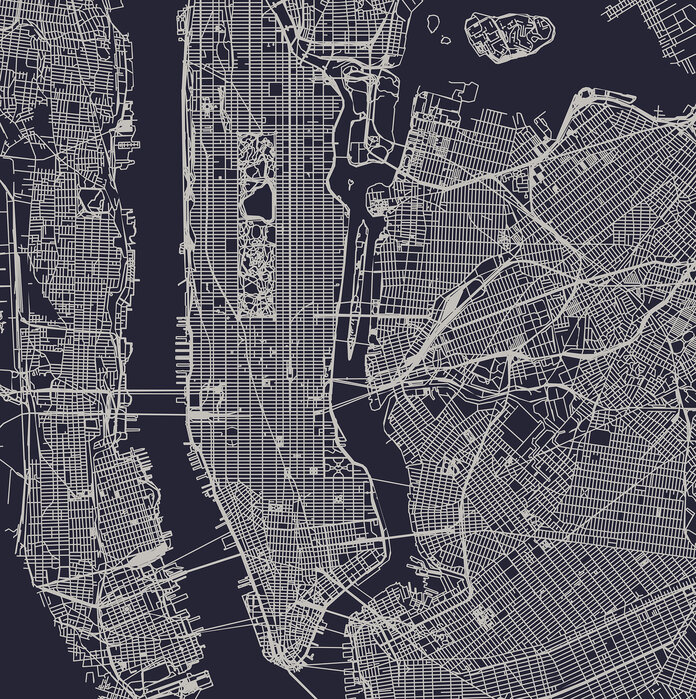

In [61]:
from IPython.display import Image
Image("new-york-city-map.jpg")

# map of New York for reference

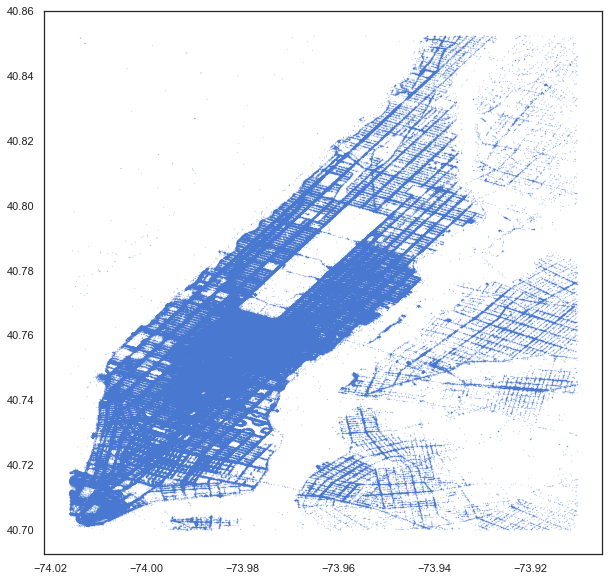

In [62]:
longitude = list(df.pickup_longitude) + list(df.dropoff_longitude)
latitude = list(df.pickup_latitude) + list(df.dropoff_latitude)
plt.figure(figsize=(10,10))
plt.plot(longitude,latitude,'.',alpha=0.4,markersize=0.5)
plt.show()

#This image shows NYC in its real shape

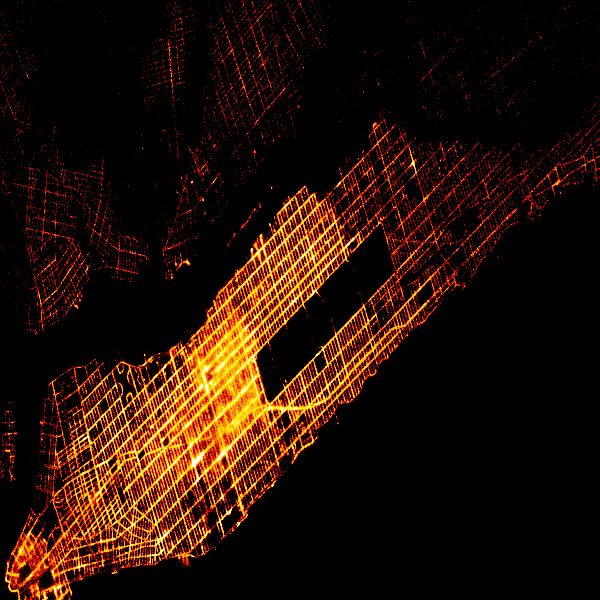

In [63]:
#Try datashader library for image processing

#only dropoffs
agg = ds.Canvas().points(df, 'dropoff_latitude', 'dropoff_longitude')
ds.tf.set_background(ds.tf.shade(agg, cmap=cc.fire), "black")

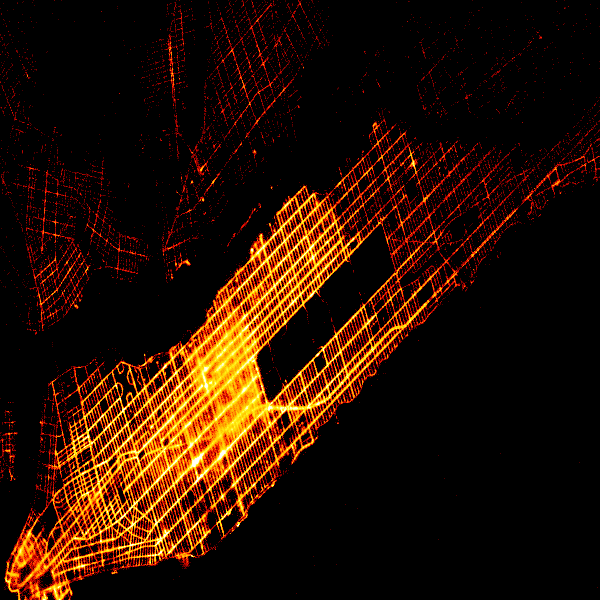

In [64]:
#Create new dataframe only containing all latitude and longitude coordinates for pickup and dropoff concatenated
locations_df = pd.DataFrame()
locations_df['latitude'] = latitude
locations_df['longitude'] = longitude

#pickups and dropoffs
agg = ds.Canvas().points(locations_df, 'latitude', 'longitude')
ds.tf.set_background(ds.tf.shade(agg, cmap=cc.fire), "black")

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
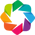

:DynamicMap   []
   :Overlay
      .Tiles.I :Tiles   [x,y]
      .RGB.I   :RGB   [dropoff_latitude,dropoff_longitude]   (R,G,B,A)

In [65]:
hv.extension('bokeh')

map_tiles  = EsriImagery().opts(alpha=0.5, width=900, height=480, bgcolor='black')
points     = hv.Points(df, ['dropoff_latitude', 'dropoff_longitude'])
taxi_trips = datashade(points, x_sampling=1, y_sampling=1, cmap=cc.fire, width=900, height=480)

map_tiles * taxi_trips

### Feature Engineering

- create the following features:
    - month
    - hour
    - week of year
    - day of year
    - day of week
    - weekend

In [66]:
df['pickup_datetime'] = pd.to_datetime(df.pickup_datetime) #convert to pandas date object

In [67]:
#create separate features from date object
df.loc[:, 'pick_month'] = df['pickup_datetime'].dt.month
df.loc[:, 'pick_hour'] = df['pickup_datetime'].dt.hour
df.loc[:, 'pick_week_of_year'] = df['pickup_datetime'].dt.isocalendar().week
df.loc[:, 'pick_day_of_year'] = df['pickup_datetime'].dt.dayofyear
df.loc[:, 'pick_day_of_week'] = df['pickup_datetime'].dt.dayofweek

In [68]:
df

id  vendor_id     pickup_datetime     dropoff_datetime  \
0        id2875421          2 2016-03-14 17:24:55  2016-03-14 17:32:30   
1        id2377394          1 2016-06-12 00:43:35  2016-06-12 00:54:38   
2        id3858529          2 2016-01-19 11:35:24  2016-01-19 12:10:48   
3        id3504673          2 2016-04-06 19:32:31  2016-04-06 19:39:40   
4        id2181028          2 2016-03-26 13:30:55  2016-03-26 13:38:10   
...            ...        ...                 ...                  ...   
1262937  id2376096          2 2016-04-08 13:31:04  2016-04-08 13:44:02   
1262938  id1049543          1 2016-01-10 07:35:15  2016-01-10 07:46:10   
1262939  id2304944          2 2016-04-22 06:57:41  2016-04-22 07:10:25   
1262940  id2714485          1 2016-01-05 15:56:26  2016-01-05 16:02:39   
1262941  id1209952          1 2016-04-05 14:44:25  2016-04-05 14:47:43   

         passenger_count  pickup_longitude  pickup_latitude  \
0                      1        -73.982155        40.767937   
1                      1        -73.980415        40.738564   
2                      1        -73.979027        40.763939   
3                      1        -74.010040        40.719971   
4                      1        -73.973053        40.793209   
...                  ...               ...              ...   
1262937                4        -73.982201        40.745522   
1262938                1        -74.000946        40.747379   
1262939                1        -73.959129        40.768799   
1262940                1        -73.982079        40.749062   
1262941                1        -73.979538        40.781750   

         dropoff_longitude  dropoff_latitude store_and_fwd_flag  \
0               -73.964630         40.765602                  N   
1               -73.999481         40.731152                  N   
2               -74.005333         40.710087                  N   
3               -74.012268         40.706718                  N   
4               -73.972923         40.782520                  N   
...                    ...               ...                ...   
1262937         -73.994911         40.740170                  N   
1262938         -73.970184         40.796547                  N   
1262939         -74.004433         40.707371                  N   
1262940         -73.974632         40.757107                  N   
1262941         -73.972809         40.790585                  N   

         trip_duration  pick_month  pick_hour  pick_week_of_year  \
0                  455           3         17                 11   
1                  663           6          0                 23   
2                 2124           1         11                  3   
3                  429           4         19                 14   
4                  435           3         13                 12   
...                ...         ...        ...                ...   
1262937            778           4         13                 14   
1262938            655           1          7                  1   
1262939            764           4          6                 16   
1262940            373           1         15                  1   
1262941            198           4         14                 14   

         pick_day_of_year  pick_day_of_week  
0                      74                 0  
1                     164                 6  
2                      19                 1  
3                      97                 2  
4                      86                 5  
...                   ...               ...  
1262937                99                 4  
1262938                10                 6  
1262939               113                 4  
1262940                 5                 1  
1262941                96                 1  

[1262942 rows x 16 columns]

In [69]:
df['weekend'] = np.zeros(len(df))
df.loc[df['pick_day_of_week'] >= 5, 'weekend'] = 1 #create weekend feature (if weekday is Sat or Sun)

In [70]:
df

id  vendor_id     pickup_datetime     dropoff_datetime  \
0        id2875421          2 2016-03-14 17:24:55  2016-03-14 17:32:30   
1        id2377394          1 2016-06-12 00:43:35  2016-06-12 00:54:38   
2        id3858529          2 2016-01-19 11:35:24  2016-01-19 12:10:48   
3        id3504673          2 2016-04-06 19:32:31  2016-04-06 19:39:40   
4        id2181028          2 2016-03-26 13:30:55  2016-03-26 13:38:10   
...            ...        ...                 ...                  ...   
1262937  id2376096          2 2016-04-08 13:31:04  2016-04-08 13:44:02   
1262938  id1049543          1 2016-01-10 07:35:15  2016-01-10 07:46:10   
1262939  id2304944          2 2016-04-22 06:57:41  2016-04-22 07:10:25   
1262940  id2714485          1 2016-01-05 15:56:26  2016-01-05 16:02:39   
1262941  id1209952          1 2016-04-05 14:44:25  2016-04-05 14:47:43   

         passenger_count  pickup_longitude  pickup_latitude  \
0                      1        -73.982155        40.767937   
1                      1        -73.980415        40.738564   
2                      1        -73.979027        40.763939   
3                      1        -74.010040        40.719971   
4                      1        -73.973053        40.793209   
...                  ...               ...              ...   
1262937                4        -73.982201        40.745522   
1262938                1        -74.000946        40.747379   
1262939                1        -73.959129        40.768799   
1262940                1        -73.982079        40.749062   
1262941                1        -73.979538        40.781750   

         dropoff_longitude  dropoff_latitude store_and_fwd_flag  \
0               -73.964630         40.765602                  N   
1               -73.999481         40.731152                  N   
2               -74.005333         40.710087                  N   
3               -74.012268         40.706718                  N   
4               -73.972923         40.782520                  N   
...                    ...               ...                ...   
1262937         -73.994911         40.740170                  N   
1262938         -73.970184         40.796547                  N   
1262939         -74.004433         40.707371                  N   
1262940         -73.974632         40.757107                  N   
1262941         -73.972809         40.790585                  N   

         trip_duration  pick_month  pick_hour  pick_week_of_year  \
0                  455           3         17                 11   
1                  663           6          0                 23   
2                 2124           1         11                  3   
3                  429           4         19                 14   
4                  435           3         13                 12   
...                ...         ...        ...                ...   
1262937            778           4         13                 14   
1262938            655           1          7                  1   
1262939            764           4          6                 16   
1262940            373           1         15                  1   
1262941            198           4         14                 14   

         pick_day_of_year  pick_day_of_week  weekend  
0                      74                 0      0.0  
1                     164                 6      1.0  
2                      19                 1      0.0  
3                      97                 2      0.0  
4                      86                 5      1.0  
...                   ...               ...      ...  
1262937                99                 4      0.0  
1262938                10                 6      1.0  
1262939               113                 4      0.0  
1262940                 5                 1      0.0  
1262941                96                 1      0.0  

[1262942 rows x 17 columns]

In [71]:
#Create new dataframe which only contains the mean trip duration per week day
summary_week_duration = pd.DataFrame(df.groupby(['pick_day_of_week'])['trip_duration'].mean())
summary_week_duration.reset_index(inplace = True)
summary_week_duration

pick_day_of_week  trip_duration
0                 0     657.749108
1                 1     724.836920
2                 2     745.859917
3                 3     752.843651
4                 4     728.212190
5                 5     683.343743
6                 6     626.082780

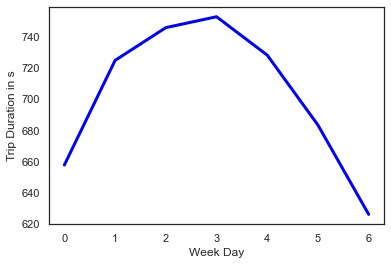

In [72]:
plt.plot(summary_week_duration['pick_day_of_week'],summary_week_duration['trip_duration'], color = 'blue', linewidth=3)
plt.xlabel('Week Day')
plt.ylabel('Trip Duration in s')
plt.show()

- Wednesday, Thursday and Friday seem to be very busy with longer trip durations
- Fastest trips on the weekend

## Get most frequent coordinates for pickup and dropoff

In [73]:
df['pickup_longitude'].mode()

0   -73.982201
Name: pickup_longitude, dtype: float64

In [74]:
# sort dataframe by value pair pickup_long and pickup_lat
top_pickup = df.groupby(["pickup_longitude", "pickup_latitude"]).size().sort_values(ascending=False)

# sort dataframe by value pair dropoff_long and dropff_lat
top_dropoff = df.groupby(["dropoff_longitude", "dropoff_latitude"]).size().sort_values(ascending=False)

In [75]:
len(top_pickup)

1210771

In [76]:
len(df) - len(top_pickup)

52171

only 52,171 coordinates arise more than once

In [77]:
top_pickup.head(20)

pickup_longitude  pickup_latitude
-73.954666        40.821003          39
-73.994072        40.751160          11
                  40.751202          11
-74.002838        40.760471          10
-73.994049        40.751228          10
                  40.751270          10
-73.994118        40.751099          10
-74.002876        40.760441          10
-73.994102        40.751129          10
                  40.751190           9
-73.994087        40.751179           9
-73.994080        40.751160           9
-73.994148        40.751179           9
-73.994179        40.751091           9
-73.994148        40.751080           9
-73.994133        40.751141           9
-73.994118        40.751129           9
-73.994057        40.751236           9
-73.994148        40.751110           8
-73.994102        40.751171           8
dtype: int64

In [78]:
top_dropoff.head(20)

dropoff_longitude  dropoff_latitude
-73.954666         40.821003           39
-74.002769         40.760578           10
-73.994682         40.750389           10
-74.002769         40.760551            8
-73.994667         40.750370            8
                   40.750462            8
-73.994659         40.750408            8
-73.991264         40.750149            7
-74.002823         40.760509            7
-73.994637         40.750439            7
-74.002762         40.760609            7
-73.992149         40.749321            7
-73.994820         40.750191            6
-73.994698         40.750381            6
-73.994598         40.750481            6
-73.994637         40.750462            6
-73.994888         40.750118            6
-73.994904         40.750111            6
-73.994667         40.750351            6
-73.991341         40.750240            6
dtype: int64

In [79]:
type(top_pickup)
top_pickup_np = top_pickup.to_numpy()

In [80]:
top_pickup_np

array([39, 11, 11, ...,  1,  1,  1], dtype=int64)

In [81]:
type(top_dropoff)
top_dropoff_np = top_dropoff.to_numpy()

### Clustering of pickup coordinates

In [82]:
from sklearn.cluster import KMeans

In [83]:
X = np.zeros((len(df), 2))

In [84]:
X[:,0] = df['pickup_latitude']
X[:,1] = df['pickup_longitude']
X

array([[ 40.76793671, -73.98215485],
       [ 40.73856354, -73.98041534],
       [ 40.7639389 , -73.97902679],
       ...,
       [ 40.76879883, -73.95912933],
       [ 40.74906158, -73.98207855],
       [ 40.78174973, -73.97953796]])

In [85]:
kmeans = KMeans(n_clusters=20, random_state=42)

In [86]:
kmeans.fit(X)

KMeans(n_clusters=20, random_state=42)

In [87]:
cluster_labels = kmeans.labels_

In [88]:
kmeans.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 20,
 'n_init': 10,
 'n_jobs': 'deprecated',
 'precompute_distances': 'deprecated',
 'random_state': 42,
 'tol': 0.0001,
 'verbose': 0}

In [89]:
X_clustered = pd.DataFrame(X)

In [90]:
X_clustered['cluster'] = cluster_labels
X_clustered

0          1  cluster
0        40.767937 -73.982155        0
1        40.738564 -73.980415        3
2        40.763939 -73.979027        8
3        40.719971 -74.010040        1
4        40.793209 -73.973053        7
...            ...        ...      ...
1262937  40.745522 -73.982201        3
1262938  40.747379 -74.000946        2
1262939  40.768799 -73.959129        5
1262940  40.749062 -73.982079        3
1262941  40.781750 -73.979538       11

[1262942 rows x 3 columns]

In [91]:
cluster_centers = X_clustered.groupby(['cluster']).mean()

In [92]:
cluster_centers

0          1
cluster                      
0        40.772915 -73.983283
1        40.712102 -74.009590
2        40.742403 -74.002438
3        40.743515 -73.981745
4        40.779716 -73.953080
5        40.770122 -73.959285
6        40.759167 -73.991578
7        40.798083 -73.966765
8        40.761922 -73.980375
9        40.755767 -73.928698
10       40.715549 -73.953721
11       40.785173 -73.975999
12       40.722028 -73.991645
13       40.822868 -73.947801
14       40.729312 -74.002669
15       40.798605 -73.944030
16       40.733153 -73.987152
17       40.752472 -73.975875
18       40.748231 -73.991595
19       40.760884 -73.968168

In [93]:
cluster_centers_ = cluster_centers.to_numpy()

## Clustering of dropoff coordinates

In [94]:
X_dropoff = np.zeros((len(df), 2))

In [95]:
X_dropoff[:,0] = df['dropoff_latitude']
X_dropoff[:,1] = df['dropoff_longitude']
X_dropoff

array([[ 40.76560211, -73.96463013],
       [ 40.73115158, -73.9994812 ],
       [ 40.71008682, -74.00533295],
       ...,
       [ 40.70737076, -74.00443268],
       [ 40.75710678, -73.97463226],
       [ 40.79058456, -73.97280884]])

In [96]:
kmeans_dropoff = KMeans(n_clusters=20, random_state=42)

In [97]:
kmeans_dropoff.fit(X_dropoff)

KMeans(n_clusters=20, random_state=42)

In [98]:
cluster_labels_dropoff = kmeans_dropoff.labels_

In [99]:
# create pandas dataframe
X_clustered_dropoff = pd.DataFrame(X_dropoff)

In [100]:
# add cluster labels to dropoff dataframe
X_clustered_dropoff['cluster'] = cluster_labels_dropoff
X_clustered_dropoff

0          1  cluster
0        40.765602 -73.964630        1
1        40.731152 -73.999481       17
2        40.710087 -74.005333        0
3        40.706718 -74.012268        0
4        40.782520 -73.972923        3
...            ...        ...      ...
1262937  40.740170 -73.994911        6
1262938  40.796547 -73.970184        3
1262939  40.707371 -74.004433        0
1262940  40.757107 -73.974632       14
1262941  40.790585 -73.972809        3

[1262942 rows x 3 columns]

In [101]:
cluster_centers_dropoff = X_clustered_dropoff.groupby(['cluster']).mean()

In [102]:
cluster_centers_dropoff

0          1
cluster                      
0        40.711129 -74.009482
1        40.760399 -73.968384
2        40.739093 -73.980832
3        40.788953 -73.973134
4        40.742993 -74.003713
5        40.761859 -73.981551
6        40.736282 -73.991524
7        40.758505 -73.925383
8        40.781004 -73.952511
9        40.802111 -73.940650
10       40.716120 -73.951352
11       40.722587 -73.987099
12       40.770212 -73.958724
13       40.759594 -73.994214
14       40.751370 -73.976382
15       40.833060 -73.940324
16       40.775522 -73.982658
17       40.726616 -74.002101
18       40.748892 -73.990248
19       40.805296 -73.961178

In [103]:
# transform pandas df into numpy array for the folium library
cluster_centers_dropoff_ = cluster_centers_dropoff.to_numpy()

# Clustering of all coordinates in one

In [104]:
locations_df

latitude  longitude
0        40.767937 -73.982155
1        40.738564 -73.980415
2        40.763939 -73.979027
3        40.719971 -74.010040
4        40.793209 -73.973053
...            ...        ...
2525879  40.740170 -73.994911
2525880  40.796547 -73.970184
2525881  40.707371 -74.004433
2525882  40.757107 -73.974632
2525883  40.790585 -73.972809

[2525884 rows x 2 columns]

In [105]:
kmeans_total = KMeans(n_clusters=20, random_state=42)

In [106]:
kmeans_total.fit(locations_df)

KMeans(n_clusters=20, random_state=42)

In [107]:
cluster_labels_total = kmeans_total.labels_

In [108]:
# create pandas dataframe
X_clustered_total = pd.DataFrame(locations_df)

In [109]:
# add cluster labels to total dataframe
X_clustered_total['cluster'] = cluster_labels_total
X_clustered_total

latitude  longitude  cluster
0        40.767937 -73.982155       17
1        40.738564 -73.980415       16
2        40.763939 -73.979027        0
3        40.719971 -74.010040        5
4        40.793209 -73.973053       12
...            ...        ...      ...
2525879  40.740170 -73.994911        1
2525880  40.796547 -73.970184        2
2525881  40.707371 -74.004433        5
2525882  40.757107 -73.974632       11
2525883  40.790585 -73.972809       12

[2525884 rows x 3 columns]

In [110]:
cluster_centers_total = X_clustered_total.groupby(['cluster']).mean()
cluster_centers_total

latitude  longitude
cluster                      
0        40.760785 -73.980727
1        40.738232 -73.989907
2        40.800463 -73.965293
3        40.780291 -73.952832
4        40.715981 -73.951925
5        40.711867 -74.009642
6        40.749178 -73.990696
7        40.769777 -73.959325
8        40.830624 -73.942268
9        40.757548 -73.926571
10       40.743342 -74.003417
11       40.759705 -73.969154
12       40.786034 -73.975305
13       40.759575 -73.993086
14       40.721666 -73.992483
15       40.729574 -74.002917
16       40.730019 -73.982732
17       40.773140 -73.983338
18       40.801837 -73.942781
19       40.748311 -73.977762

In [111]:
# transform pandas df into numpy array for the folium library
cluster_centers_total_ = cluster_centers_total.to_numpy()

## Total clusterin with 30 centroids

In [122]:
kmeans_total_30 = KMeans(n_clusters=30, random_state=42)

In [123]:
kmeans_total_30.fit(locations_df)

KMeans(n_clusters=30, random_state=42)

In [124]:
cluster_labels_total_30 = kmeans_total_30.labels_

In [125]:
# create pandas dataframe
X_clustered_total_30 = pd.DataFrame(locations_df)

In [126]:
# add cluster labels to total dataframe
X_clustered_total_30['cluster'] = cluster_labels_total_30
X_clustered_total_30

latitude  longitude  cluster
0        40.767937 -73.982155       10
1        40.738564 -73.980415       21
2        40.763939 -73.979027        4
3        40.719971 -74.010040       13
4        40.793209 -73.973053       26
...            ...        ...      ...
2525879  40.740170 -73.994911        9
2525880  40.796547 -73.970184       15
2525881  40.707371 -74.004433       28
2525882  40.757107 -73.974632        7
2525883  40.790585 -73.972809       26

[2525884 rows x 3 columns]

In [127]:
cluster_centers_total_30 = X_clustered_total_30.groupby(['cluster']).mean()
cluster_centers_total_30

latitude  longitude
cluster                      
0        40.741067 -74.002760
1        40.780291 -73.952832
2        40.725057 -73.979105
3        40.749178 -73.990696
4        40.760785 -73.980727
5        40.744671 -73.979641
6        40.758773 -73.996790
7        40.756944 -73.968813
8        40.773842 -73.959640
9        40.736638 -73.991877
10       40.771302 -73.984881
11       40.729574 -74.002917
12       40.721666 -73.992483
13       40.716984 -74.009064
14       40.782413 -73.976913
15       40.800463 -73.965293
16       40.801837 -73.942781
17       40.757548 -73.926571
18       40.715981 -73.951925
19       40.830624 -73.942268
20       40.751153 -73.976296
21       40.731331 -73.983691
22       40.748067 -74.004782
23       40.767247 -73.959129
24       40.760278 -73.989837
25       40.763683 -73.969646
26       40.789084 -73.973952
27       40.776608 -73.980427
28       40.707987 -74.010080
29       40.740895 -73.986616

In [132]:
# transform pandas df into numpy array for the folium library
cluster_centers_total_30_ = cluster_centers_total_30.to_numpy()
cluster_centers_total_30_

array([[ 40.74106712, -74.0027602 ],
       [ 40.78029121, -73.95283176],
       [ 40.72505672, -73.97910534],
       [ 40.74917822, -73.99069606],
       [ 40.76078538, -73.98072748],
       [ 40.74467086, -73.97964099],
       [ 40.75877263, -73.99678987],
       [ 40.75694402, -73.96881342],
       [ 40.77384174, -73.9596403 ],
       [ 40.73663818, -73.99187705],
       [ 40.77130201, -73.98488123],
       [ 40.72957429, -74.00291679],
       [ 40.72166558, -73.99248263],
       [ 40.71698402, -74.00906363],
       [ 40.78241253, -73.97691273],
       [ 40.80046269, -73.96529323],
       [ 40.80183658, -73.94278096],
       [ 40.75754768, -73.926571  ],
       [ 40.71598112, -73.95192469],
       [ 40.83062441, -73.94226815],
       [ 40.75115275, -73.97629566],
       [ 40.73133101, -73.98369066],
       [ 40.74806732, -74.0047824 ],
       [ 40.76724743, -73.95912923],
       [ 40.76027842, -73.9898368 ],
       [ 40.76368265, -73.96964581],
       [ 40.7890843 , -73.9739515 ],
 

# Map of New York

In [112]:
import folium
from folium.plugins import MarkerCluster
boulder_coords = location=[40.778, -73.953]

#### Cluster centroids of pickup coordinates

In [113]:
#Create the map
map_pickup = folium.Map(location = boulder_coords, zoom_start = 12)

#Add 20 cluster centroids to the map
for i in range(20):
    folium.Marker([cluster_centers_[i,0],cluster_centers_[i,1]], popup = f"cluster {i}").add_to(map_pickup)

#Display the map
map_pickup

#### Cluster centroids of dropoff coordinates

In [114]:
#Create the map
map_dropoff = folium.Map(location = boulder_coords, zoom_start = 12)

for i in range(20):
    folium.Marker([cluster_centers_dropoff_[i,0],cluster_centers_dropoff_[i,1]], popup = f"cluster {i}").add_to(map_dropoff)

#Display the map
map_dropoff

#### Pickup and dropoff in a single map

In [115]:
#Create the map
map_pickup_dropoff = folium.Map(location = boulder_coords, zoom_start = 12)

#Add markers to the map
for i in range(20):
    folium.RegularPolygonMarker([cluster_centers_dropoff_[i,0],cluster_centers_dropoff_[i,1]], popup = f"dropoff cluster {i}", fill_color = '#00ff40',
                            number_of_sides = 3, radius = 10).add_to(map_pickup_dropoff)
    folium.RegularPolygonMarker([cluster_centers_[i,0],cluster_centers_[i,1]], popup = f"pickup cluster {i}", fill_color = '#ff0000',
                            number_of_sides = 8, radius = 10).add_to(map_pickup_dropoff)

# Display the map
map_pickup_dropoff

- pickup and dropoff cluster centroids are sometimes very close to each other, such that they can be merged in some cases

### Total cluster centers for pickup AND dropoff

In [129]:
#Create the map
map_total = folium.Map(location = boulder_coords, zoom_start = 12)

for i in range(20):
    folium.Marker([cluster_centers_total_[i,0],cluster_centers_total_[i,1]], popup = f"cluster {i}").add_to(map_total)

#Display the map
map_total

## Total cluster centers for pickup and dropoff with 30 clusters 

In [133]:
#Create the map
map_total_30 = folium.Map(location = boulder_coords, zoom_start = 12)

for i in range(30):
    folium.Marker([cluster_centers_total_30_[i,0],cluster_centers_total_30_[i,1]], popup = f"cluster {i}").add_to(map_total_30)

#Display the map
map_total_30

# Additional Feature Engineering

## Create feature which indicates cluster start and end for each taxi ride

In [117]:
#use total kmeans clustering algorithm to predict clusters for pickup and dropoff
df['pickup_cluster'] = kmeans_total.predict(df[['pickup_latitude','pickup_longitude']])
df['dropoff_cluster'] = kmeans_total.predict(df[['dropoff_latitude','dropoff_longitude']])
df

id  vendor_id     pickup_datetime     dropoff_datetime  \
0        id2875421          2 2016-03-14 17:24:55  2016-03-14 17:32:30   
1        id2377394          1 2016-06-12 00:43:35  2016-06-12 00:54:38   
2        id3858529          2 2016-01-19 11:35:24  2016-01-19 12:10:48   
3        id3504673          2 2016-04-06 19:32:31  2016-04-06 19:39:40   
4        id2181028          2 2016-03-26 13:30:55  2016-03-26 13:38:10   
...            ...        ...                 ...                  ...   
1262937  id2376096          2 2016-04-08 13:31:04  2016-04-08 13:44:02   
1262938  id1049543          1 2016-01-10 07:35:15  2016-01-10 07:46:10   
1262939  id2304944          2 2016-04-22 06:57:41  2016-04-22 07:10:25   
1262940  id2714485          1 2016-01-05 15:56:26  2016-01-05 16:02:39   
1262941  id1209952          1 2016-04-05 14:44:25  2016-04-05 14:47:43   

         passenger_count  pickup_longitude  pickup_latitude  \
0                      1        -73.982155        40.767937   
1                      1        -73.980415        40.738564   
2                      1        -73.979027        40.763939   
3                      1        -74.010040        40.719971   
4                      1        -73.973053        40.793209   
...                  ...               ...              ...   
1262937                4        -73.982201        40.745522   
1262938                1        -74.000946        40.747379   
1262939                1        -73.959129        40.768799   
1262940                1        -73.982079        40.749062   
1262941                1        -73.979538        40.781750   

         dropoff_longitude  dropoff_latitude store_and_fwd_flag  \
0               -73.964630         40.765602                  N   
1               -73.999481         40.731152                  N   
2               -74.005333         40.710087                  N   
3               -74.012268         40.706718                  N   
4               -73.972923         40.782520                  N   
...                    ...               ...                ...   
1262937         -73.994911         40.740170                  N   
1262938         -73.970184         40.796547                  N   
1262939         -74.004433         40.707371                  N   
1262940         -73.974632         40.757107                  N   
1262941         -73.972809         40.790585                  N   

         trip_duration  pick_month  pick_hour  pick_week_of_year  \
0                  455           3         17                 11   
1                  663           6          0                 23   
2                 2124           1         11                  3   
3                  429           4         19                 14   
4                  435           3         13                 12   
...                ...         ...        ...                ...   
1262937            778           4         13                 14   
1262938            655           1          7                  1   
1262939            764           4          6                 16   
1262940            373           1         15                  1   
1262941            198           4         14                 14   

         pick_day_of_year  pick_day_of_week  weekend  pickup_cluster  \
0                      74                 0      0.0              17   
1                     164                 6      1.0              16   
2                      19                 1      0.0               0   
3                      97                 2      0.0               5   
4                      86                 5      1.0              12   
...                   ...               ...      ...             ...   
1262937                99                 4      0.0              19   
1262938                10                 6      1.0              10   
1262939               113                 4      0.0               7   
1262940                 5   

In [118]:
#aggregate by pickup_cluster
cluster_cross_df = pd.DataFrame()
cluster_cross_df['pickup_cluster'] = df['pickup_cluster']
cluster_cross_df['dropoff_cluster'] = df['dropoff_cluster']
cluster_cross_df.groupby(["pickup_cluster", "dropoff_cluster"]).size().reset_index(name="frequ")

pickup_cluster  dropoff_cluster  frequ
0                 0                0   9961
1                 0                1   5027
2                 0                2   2091
3                 0                3   5720
4                 0                4    627
..              ...              ...    ...
395              19               15   3913
396              19               16   7028
397              19               17   2876
398              19               18    918
399              19               19  12263

[400 rows x 3 columns]

In [119]:
#transform df in order to create the heatmap below
cluster_cross_df = cluster_cross_df.groupby(['pickup_cluster','dropoff_cluster']).size().unstack('dropoff_cluster', fill_value=0)
cluster_cross_df

dropoff_cluster     0     1     2      3     4     5      6      7     8   \
pickup_cluster                                                              
0                 9961  5027  2091   5720   627  3617  11679   6833   938   
1                 5448  7290   637   2415  1128  4364   8993   3103   441   
2                 1237   315  6579   3419    34   236    669   1435  2150   
3                 5051  1601  3352  18952   227  1409   2665  17161   983   
4                   72    97    33     60  3288   124     95     71    25   
5                 3579  3435   359   1148  1002  9412   3622   1270   233   
6                13264  8943  1159   3350   917  4456   6326   4291   762   
7                 7102  2527  1827  18962   373  1830   3783  15265   695   
8                  112    46   739    192    17    39     96     94  1617   
9                  239   152    68    266   273   116    191    484    88   
10                4157  7171   833   1297   774  4593   7223   1511   574   
11               10598  5670  1576  12932   858  3241   7686  19457   615   
12                3925   807  7228   6126    95   587   1450   4705  1498   
13                9507  3175  1529   2118   420  2477   7266   2427  1334   
14                2587  5863   517   1535  4186  6500   4075   1720   432   
15                3642  6991   546   1226  1304  6276   5166   1390   431   
16                1671  5630   375   1577  1408  2734   3815   1852   391   
17                7428  1576  3992   4611   232  1171   3201   5550  1123   
18                 249   122  1396   2059    33    97    185    657  1113   
19                8566  9694   844   5136   964  4544  10987   7144   450   

dropoff_cluster    9     10     11    12    13    14    15    16    17    18  \
pickup_cluster                                                                 
0                1418  3980  10553  4632  8375  2587  3049  2129  7923  1093   
1                 673  7677   5972  1158  4013  7192  7251  7275  1876   625   
2                  98   409   1166  6123   914   185   241   170  2815  3128   
3                 571   890  10618  6142  1538   968   814  1231  3970  5168   
4                 275    83    129    31    61   601   136   256    46    45   
5                 342  3919   2659   604  2502  6348  6253  2631  1027   271   
6                 965  7704   7926  1909  9778  4308  5471  4580  3709   816   
7                 866  1213  16915  5162  2081  1352  1175  1735  4960  2237   
8                  38    76     85   282   165    35    41    28   163   957   
9                4170    76    763    68   121   110    56   110    98   139   
10                433  7492   2586  1246  6261  4576  7197  3413  2340   494   
11               2160  2762  13499  3611  4441  2975  2572  3667  5706  1480   
12                186   897   3342  8504  2201   423   552   375  8750  1662   
13                772  5592   4725  2599  7937  1819  2500  1577  5744   946   
14                698  4321   2888   698  2145  7794  6365  7233  1031   565   
15                462  6633   2403   873  2894  6835  6540  4283  1301   409   
16                579  2733   2931   438  1515  6460  3661  5389   668   572   
17                464  2005   6396  9623  5818   822  1087   737  8318  1045   
18                 67    88    390   489   218   118    56   133   273  4080   
19               1147  4174  12980  1627  5567  5020  3913  7028  2876   918   

dropoff_cluster     19  
pickup_cluster          
0                 9023  
1                11437  
2                  556  
3                 4126  
4                  135  
5                 3814  
6                12622  
7                 6999  
8                   43  
9                  376  
10                4460  
11               14107  
12                1460  
13                5283  
14                5339  
15                4076  
16                6585  
17                3134  
18                 247  
19               12

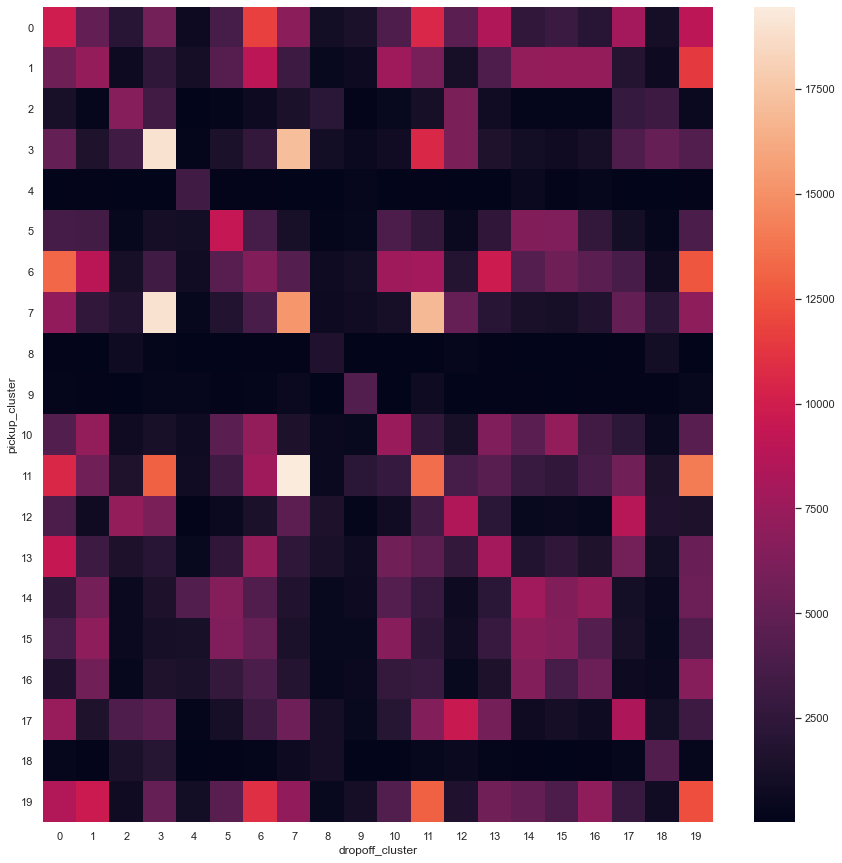

In [120]:
# plot heatmap
plt.figure(figsize=(15,15))
ax = sns.heatmap(cluster_cross_df)

# turn the axis label
for item in ax.get_yticklabels():
    item.set_rotation(0)

for item in ax.get_xticklabels():
    item.set_rotation(0)

plt.show()

# Tryouts

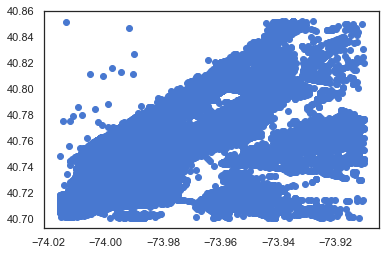

In [121]:
plt.scatter(x=df['pickup_longitude'], y=df['pickup_latitude'])
plt.show()